<font size="6"><b>Exploratory Data Analysis on 911 calls</b></font>

For this project we'll analyze the 911 calls dataset from <a href= "https://www.kaggle.com/mchirico/montcoalert" >Kaggle </a> for Montgomery County, PA 


Lets start by importing essential libraries

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Lets read the file

In [2]:
data=pd.read_csv("911.csv")

The data contains following fields

In [3]:
list(data.columns)

['lat', 'lng', 'desc', 'zip', 'title', 'timeStamp', 'twp', 'addr', 'e']

Description of the columns
- lat       :  Latitude
- lng       :  Longitude
- desc      :  Description of Emergency Call
- zip       :  Zipcode
- title     :  Title of Emergency
- timeStamp :  Date and time of the call YYYY-MM-DD HH:MM:SS 
- twp       :  Township
- addr      :  Address
- e         :  Index column, always 1

Following are its data types

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB


In [5]:
data.head() #checking the head of the data frame

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [6]:
#Total number of rows in the data frame
len(data)

663522

Lets do some basic analysis

In [7]:
#lets identify number of different towns
data.twp.nunique()

68

In [8]:
#Name of the towns
data.twp.unique()

array(['NEW HANOVER', 'HATFIELD TOWNSHIP', 'NORRISTOWN',
       'LOWER POTTSGROVE', 'LANSDALE', 'HORSHAM', 'SKIPPACK',
       'LOWER SALFORD', 'PLYMOUTH', 'MONTGOMERY', 'UPPER MORELAND',
       'CHELTENHAM', 'UPPER MERION', 'WHITEMARSH', 'UPPER GWYNEDD',
       'LOWER PROVIDENCE', 'UPPER DUBLIN', 'WHITPAIN', 'DELAWARE COUNTY',
       'FRANCONIA', 'WEST CONSHOHOCKEN', 'LOWER MERION', 'LIMERICK',
       'TOWAMENCIN', 'DOUGLASS', 'POTTSTOWN', 'BRIDGEPORT', 'AMBLER',
       'CHESTER COUNTY', 'UPPER HANOVER', 'SPRINGFIELD', 'ROCKLEDGE',
       'ABINGTON', 'WEST NORRITON', 'ROYERSFORD', 'UPPER SALFORD',
       'LOWER MORELAND', 'CONSHOHOCKEN', 'PENNSBURG', 'TELFORD',
       'EAST NORRITON', 'UPPER FREDERICK', 'UPPER PROVIDENCE', 'SALFORD',
       'HATFIELD BORO', 'LEHIGH COUNTY', 'LOWER GWYNEDD', 'MARLBOROUGH',
       'BRYN ATHYN', 'HATBORO', 'WORCESTER', 'COLLEGEVILLE',
       'SCHWENKSVILLE', 'PERKIOMEN', 'SOUDERTON', 'UPPER POTTSGROVE',
       'LOWER FREDERICK', 'BUCKS COUNTY', 'RED HILL'

In [9]:
#lets identify number of different title
data.title.nunique()

148

In [10]:
#Different title
data.title.unique()

array(['EMS: BACK PAINS/INJURY', 'EMS: DIABETIC EMERGENCY',
       'Fire: GAS-ODOR/LEAK', 'EMS: CARDIAC EMERGENCY', 'EMS: DIZZINESS',
       'EMS: HEAD INJURY', 'EMS: NAUSEA/VOMITING',
       'EMS: RESPIRATORY EMERGENCY', 'EMS: SYNCOPAL EPISODE',
       'Traffic: VEHICLE ACCIDENT -', 'EMS: VEHICLE ACCIDENT',
       'Traffic: DISABLED VEHICLE -', 'Fire: APPLIANCE FIRE',
       'EMS: GENERAL WEAKNESS', 'Fire: CARBON MONOXIDE DETECTOR',
       'EMS: UNKNOWN MEDICAL EMERGENCY', 'EMS: UNRESPONSIVE SUBJECT',
       'Fire: VEHICLE ACCIDENT', 'EMS: ALTERED MENTAL STATUS',
       'Fire: FIRE ALARM', 'EMS: CVA/STROKE',
       'Traffic: ROAD OBSTRUCTION -', 'EMS: SUBJECT IN PAIN',
       'EMS: HEMORRHAGING', 'EMS: FALL VICTIM', 'EMS: ASSAULT VICTIM',
       'EMS: SEIZURES', 'EMS: MEDICAL ALERT ALARM',
       'EMS: ABDOMINAL PAINS', 'Fire: PUMP DETAIL',
       'Fire: FIRE INVESTIGATION', 'EMS: OVERDOSE', 'EMS: MATERNITY',
       'EMS: UNCONSCIOUS SUBJECT', 'EMS: CHOKING', 'EMS: LACERATIONS',
     

In [11]:
#Lets identify which top 10 towns had most 911 calls
data['twp'].value_counts().head(10)

LOWER MERION        55490
ABINGTON            39947
NORRISTOWN          37633
UPPER MERION        36010
CHELTENHAM          30574
POTTSTOWN           27387
UPPER MORELAND      22932
LOWER PROVIDENCE    22476
PLYMOUTH            20116
UPPER DUBLIN        18862
Name: twp, dtype: int64

In [12]:
#Lets identify which are top 10 title
data['title'].value_counts().head(10)

Traffic: VEHICLE ACCIDENT -    148372
Traffic: DISABLED VEHICLE -     47909
Fire: FIRE ALARM                38336
EMS: FALL VICTIM                34676
EMS: RESPIRATORY EMERGENCY      34248
EMS: CARDIAC EMERGENCY          32332
EMS: VEHICLE ACCIDENT           25513
Traffic: ROAD OBSTRUCTION -     23235
EMS: SUBJECT IN PAIN            19646
EMS: HEAD INJURY                18301
Name: title, dtype: int64

In [13]:
#Clean the data
arr=data['title'].str.split(":")
result=[]
for i in arr:
    result.append(i[0])
data['Reason']=result

Most common reason for a 911 call

In [14]:
data['Reason'].value_counts().head(10)

EMS        332692
Traffic    230208
Fire       100622
Name: Reason, dtype: int64

<AxesSubplot:xlabel='Reason', ylabel='count'>

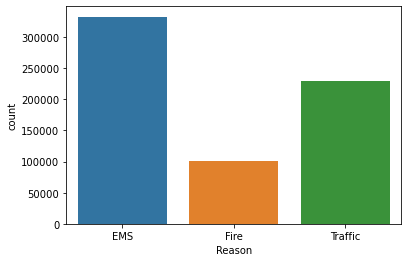

In [15]:
sns.countplot(data['Reason'])

In [16]:
#lets group by township and Reason along with value_counts
gk = data.groupby(['twp','Reason']).size().unstack(fill_value=0)
gk

Reason,EMS,Fire,Traffic
twp,,,
ABINGTON,20617,6459,12871
AMBLER,2631,954,869
BERKS COUNTY,1841,10,79
BRIDGEPORT,2011,563,1121
BRYN ATHYN,477,281,496
...,...,...,...
WEST NORRITON,6379,1365,3443
WEST POTTSGROVE,1520,598,985
WHITEMARSH,7236,3070,7448


Now lets find what were the top complaints in LOWER MERION, ABINGTON, NORRISTOWN, UPPER MERION, CHELTENHAM about

In [17]:
#About Lower Merion
gk.loc['LOWER MERION'].sort_values(ascending=False)

Reason
Traffic    23758
EMS        21578
Fire       10154
Name: LOWER MERION, dtype: int64

In [18]:
#About ABINGTON
gk.loc['ABINGTON'].sort_values(ascending=False)

Reason
EMS        20617
Traffic    12871
Fire        6459
Name: ABINGTON, dtype: int64

In [19]:
#About NORRISTOWN
gk.loc['NORRISTOWN'].sort_values(ascending=False)

Reason
EMS        24774
Traffic     7611
Fire        5248
Name: NORRISTOWN, dtype: int64

In [20]:
#About UPPER MERION
gk.loc['UPPER MERION'].sort_values(ascending=False).head(5)

Reason
Traffic    17131
EMS        14103
Fire        4776
Name: UPPER MERION, dtype: int64

In [21]:
#About CHELTENHAM
gk.loc['CHELTENHAM'].sort_values(ascending=False).head(5)

Reason
EMS        14351
Traffic    11423
Fire        4800
Name: CHELTENHAM, dtype: int64

In [22]:
arr=data['timeStamp'].str.split(" ")
date=[]
time=[]
for i in arr:
    date.append(i[0])
    time.append(i[1])
data['Date']=date
data['Time']=time

In [23]:
data['Date'] = pd.to_datetime(data['Date']) #date is in string. converting the column from string to DateTime objects
data['Day_of_week'] = data['Date'].dt.day_name()

In [24]:
data['Day_of_week'].value_counts()

Friday       102942
Wednesday     99157
Thursday      98683
Tuesday       97684
Monday        96745
Saturday      89452
Sunday        78859
Name: Day_of_week, dtype: int64

Highest number of calls took place on Friday

In [25]:
#Lets find out in which year highest 911 calls took place
data['Year'] = data['Date'].dt.year
data['Year'].value_counts()

2018    151527
2019    149118
2016    142360
2017    140343
2020     72258
2015      7916
Name: Year, dtype: int64

Highest number of calls took place in 2018

<AxesSubplot:xlabel='Year', ylabel='count'>

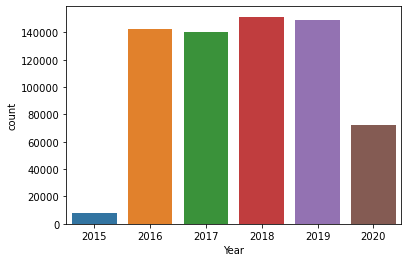

In [26]:
sns.countplot(data['Year'])

In [27]:
gd = data.groupby(['Reason','Day_of_week'],sort=False).size().unstack(fill_value=0)
gd

Day_of_week,Thursday,Friday,Saturday,Sunday,Monday,Tuesday,Wednesday
Reason,,,,,,,
EMS,47620,49368,46436,44108,48750,48371,48039
Fire,14613,15325,13898,12950,14499,14311,15026
Traffic,36450,38249,29118,21801,33496,35002,36092


In [28]:
sorter = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
sorterIndex = dict(zip(sorter,range(len(sorter))))
data['Day_id'] = data['Day_of_week'].map(sorterIndex)
data.sort_values('Day_id', inplace=True)

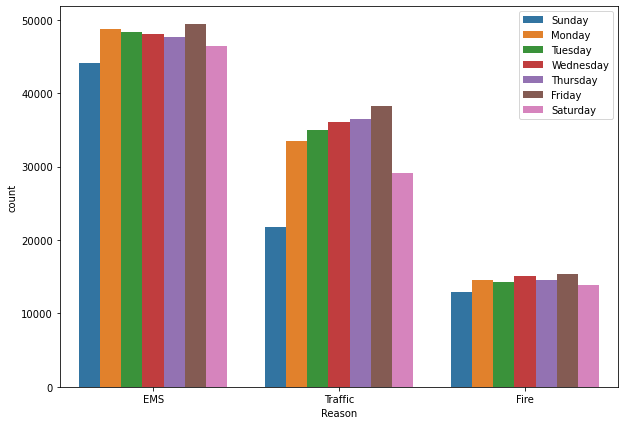

In [29]:
plt.figure(figsize=(10, 7))
sns.countplot(data['Reason'],hue=data['Day_of_week'])
plt.legend(bbox_to_anchor=(1,1))

Interesting to know that calls on Friday were highest for all three reasons but on Saturday and Sunday it were lowest

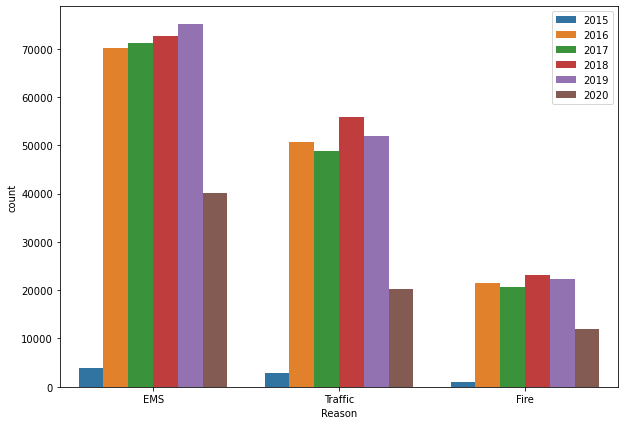

In [30]:
plt.figure(figsize=(10, 7))
sns.countplot(data['Reason'],hue=data['Year'])
plt.legend(bbox_to_anchor=(1,1))

In [31]:
data['Date'].max()

Timestamp('2020-07-29 00:00:00')

We only have data till July of 2020 so not taking that into consideration we can see an increasing trend in 911 calls for EMS over the years

In [32]:
data['Month'] = data['Date'].dt.month
data['Month'].value_counts()

1     62336
6     60034
3     60027
7     59832
12    57692
5     57509
2     55427
4     53671
10    51240
11    50182
8     48359
9     47213
Name: Month, dtype: int64

<AxesSubplot:>

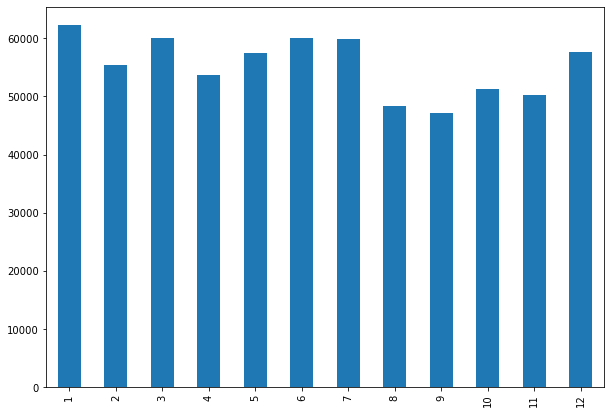

In [33]:
plt.figure(figsize=(10, 7))
data['Month'].value_counts().sort_index(ascending=True).plot(kind='bar')

Highest number of calls took place in January

Lets see in more detail which were the dates

In [34]:
data['Monthname'] = data['Date'].dt.month_name()

jandf=data.loc[data['Monthname'] == 'January']

In [35]:
jandf['day'] = jandf['Date'].dt.day

In [36]:
jandf['day'].value_counts().sort_values()#only jan dataset

1     1571
31    1750
21    1796
27    1797
28    1841
29    1850
20    1856
14    1859
17    1872
16    1872
2     1913
30    1949
19    1950
6     1954
15    1955
13    1962
26    1976
9     1993
8     1996
7     2021
22    2045
5     2088
11    2113
10    2116
3     2125
18    2201
4     2248
25    2292
24    2328
12    2333
23    2714
Name: day, dtype: int64

In [37]:
data['day'] = data['Date'].dt.day
data['day'].value_counts().sort_values()#entire dataset

31    12386
30    19249
29    20433
27    20748
8     20902
1     20963
26    21052
5     21290
28    21382
4     21507
14    21515
25    21549
10    21563
18    21608
6     21647
9     21653
20    21668
16    21706
19    21789
22    21860
21    21901
17    21910
12    22003
24    22099
23    22174
7     22197
11    22228
13    22500
2     23069
3     23349
15    23622
Name: day, dtype: int64

Lowest number of calls took place on 31st of Jan in the entire dataset

Let's see if there is an hour of the day when most calls took place

In [38]:
data['Time'] = pd.to_datetime(data['Time'])
data['Hour']= data['Time'].dt.hour

In [39]:
data['Hour'].value_counts().sort_values()

4      9265
3      9488
2     10653
5     11676
1     11751
0     13863
23    16892
6     17219
22    20313
21    24659
7     26971
20    28079
19    32442
8     33380
9     35477
10    36577
18    37322
11    38076
13    39797
12    40097
14    40346
15    42263
16    42797
17    44119
Name: Hour, dtype: int64

In [40]:
heatmap_data = data.groupby(['Day_of_week','Hour']).size().unstack(fill_value=0)
heatmap_data

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day_of_week,,,,,,,,,,,,,,,,,,,,,
Friday,1983,1635,1449,1296,1339,1639,2670,4143,5018,5288,...,6394,7040,7065,7113,5668,5056,4375,3913,3422,2834
Monday,1894,1571,1368,1272,1336,1844,2675,4430,5504,5724,...,5713,6289,6346,6408,5441,4488,3823,3254,2658,2072
Saturday,2447,2059,1883,1592,1451,1580,1880,2489,3457,4315,...,5421,5181,5211,5213,4980,4753,4127,3895,3226,2965
Sunday,2424,2135,1946,1614,1471,1488,1726,2408,3001,3728,...,4744,4475,4560,4505,4402,4135,3748,3161,2629,2323
Thursday,1731,1408,1426,1236,1293,1775,2816,4432,5297,5412,...,6079,6493,6375,6935,5512,4703,4045,3490,2844,2354
Tuesday,1720,1459,1322,1213,1247,1741,2784,4425,5634,5566,...,5926,6252,6495,6883,5628,4621,3845,3409,2708,2137
Wednesday,1664,1484,1259,1265,1128,1609,2668,4644,5469,5444,...,6069,6533,6745,7062,5691,4686,4116,3537,2826,2207


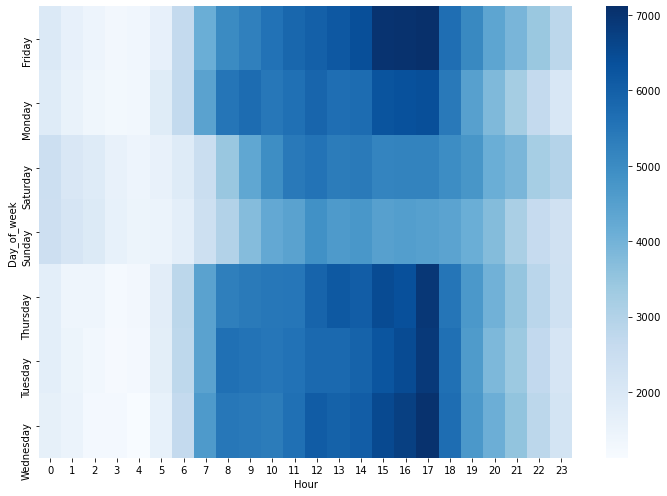

In [41]:
plt.figure(figsize=(10, 7))
sns.heatmap(heatmap_data, cmap="Blues")
plt.tight_layout()

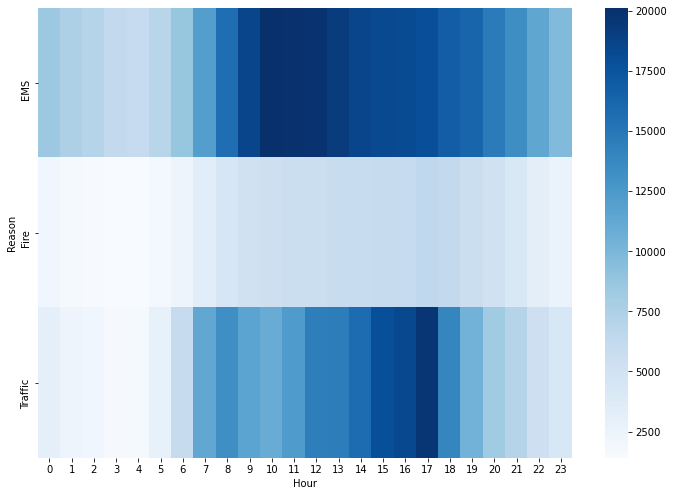

In [42]:
heatmap_data1 = data.groupby(['Reason','Hour']).size().unstack(fill_value=0)
plt.figure(figsize=(10, 7))
sns.heatmap(heatmap_data1, cmap="Blues")
plt.tight_layout()

<font size="4"><b>Insights</b></font>

- Highest number of 911 calls were made for EMS
- Top 5 towns with most 911 calls were LOWER MERION, ABINGTON, NORRISTOWN, UPPER MERION, CHELTENHAM 
- Highest number of calls took place in 2018
- Calls on Friday were highest for all three reasons(EMS, Traffic, Fire) but on the other hand on Saturday and Sunday calls for all three reasons(EMS, Traffic, Fire) were lowest
- We only have data till July of 2020 so not taking that year into consideration we can see an increasing trend in 911 calls for EMS
- Lowest number of calls took place on 31st Jan
- Most calls took place around the end of office hours on weekdays
- For Traffic most of the calls took place between 3:00pm to 5:00pm with 5:00pm being highest
- For EMS most of the calls took place between 9:00am to 1:00pm